## Setup

In [0]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

import tensorflow as tf

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a term we use to describe the intial process of exploring and trying to better understand a dataset. It is a crucial early step that we need to take when approaching a new problem.

This notebook presents a simple way of tackling EDA on a tabular dataset. Very often, the precise steps will differ depending on your problem and dataset, but this notebook aims to provide a "feel" of what it is like to do EDA.

**Titanic Dataset**

![Titanic (source image for Kaggle)](https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/header.png)

The `titanic.csv` file contains data for 891 of the real [Titanic](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic) passengers. Each row represents one person. The columns describe different attributes about the person. We can use this small dataset to develop toy models to predict, based on the attributes of a person, the likelihood of someone to survive the Titantic disaster.

## Loading the Data

First, we will need to download the dataset. The [`tf.keras.utils.get_file`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file) function is very useful since it caches the downloaded files automatically. It can also be used to download and extract archives (such as `zip` files).

In [2]:
DATA_URL = "https://deeplearning-mat.s3-ap-southeast-1.amazonaws.com/titanic.csv"
DATA_DIR = tf.keras.utils.get_file("titanic.csv", DATA_URL, cache_subdir='datasets')

print("Dataset present at:", DATA_DIR)

Dataset present at: /root/.keras/datasets/titanic.csv


Next, we can use the popular [Pandas](https://pandas.pydata.org/) dataframe library to load the CSV file into a `Dataframe` object and display the data in a nice tabular format.

In [3]:
# use Pandas to load the csv file

df = pd.read_csv(DATA_DIR)

print("df is of type", type(df))

df is of type <class 'pandas.core.frame.DataFrame'>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# look at the top few rows of the dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# look at the last few rows of the dataset

df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


The first thing we notice: **there are missing (`NaN`) values!**

This is a huge deal since now we must decide how to deal with that, since obviously missing some data columns in our training set, and very possibly test set and real world, will result in problems for our ML algorithm.

## Search for Missing Data

Missing data is a real problem that is relatively common to encounter in real world datasets.

We can use `isnull()` on the `Dataframe` to check for missing data. `isnull()` will return a new `Dataframe` object, which will show `True` values where there is missing data, and `False` where data is present.

In [7]:
df.isnull().tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False
890,False,False,False,False,False,False,False,False,False,False,True,False


In the above dataframe, everywhere with `True` values have missing/`NaN` values.

In [8]:
for col in df.columns:
    col_has_null = df[col].isnull().values.any()
    if col_has_null:
        print("Column", col, "has null value is:", col_has_null)

Column Age has null value is: True
Column Cabin has null value is: True
Column Embarked has null value is: True


We observe from the output above that the following columns have missing data:

* `Age`
* `Cabin`
* `Embarked`

### "Fixing" the Missing Data

Now, we shall "fix" the dataset by adding in values that might be sensible. Of course, another approach might be to remove the columns with missing data, or the rows with missing data. The best approach would vary depending on the type of problem, and the extent of missing data.

In [0]:
# fill missing ages/fares with mean value

df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Fare"].fillna(df["Fare"].mean(), inplace=True)

# fill cabin and embarked with "unknown" category

df["Cabin"].fillna("<UNK>", inplace=True)
df["Embarked"].fillna("<UNK>", inplace=True)

## Data Exploration

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Survival ratio: 0.3838383838383838


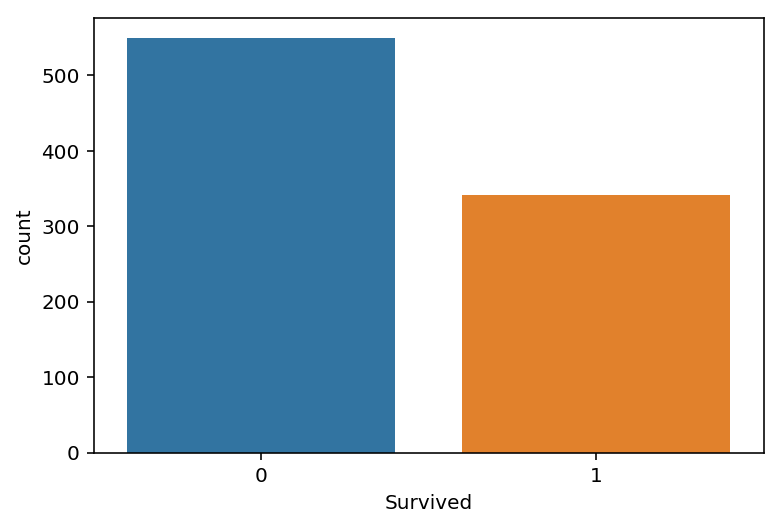

In [11]:
ratio = df.Survived.sum()/df.Survived.count()
print("Survival ratio:", ratio)

seaborn.countplot(x='Survived', data=df);

## Creative a Naive Hypothesis

What if we just assumed that females lived, and males died?

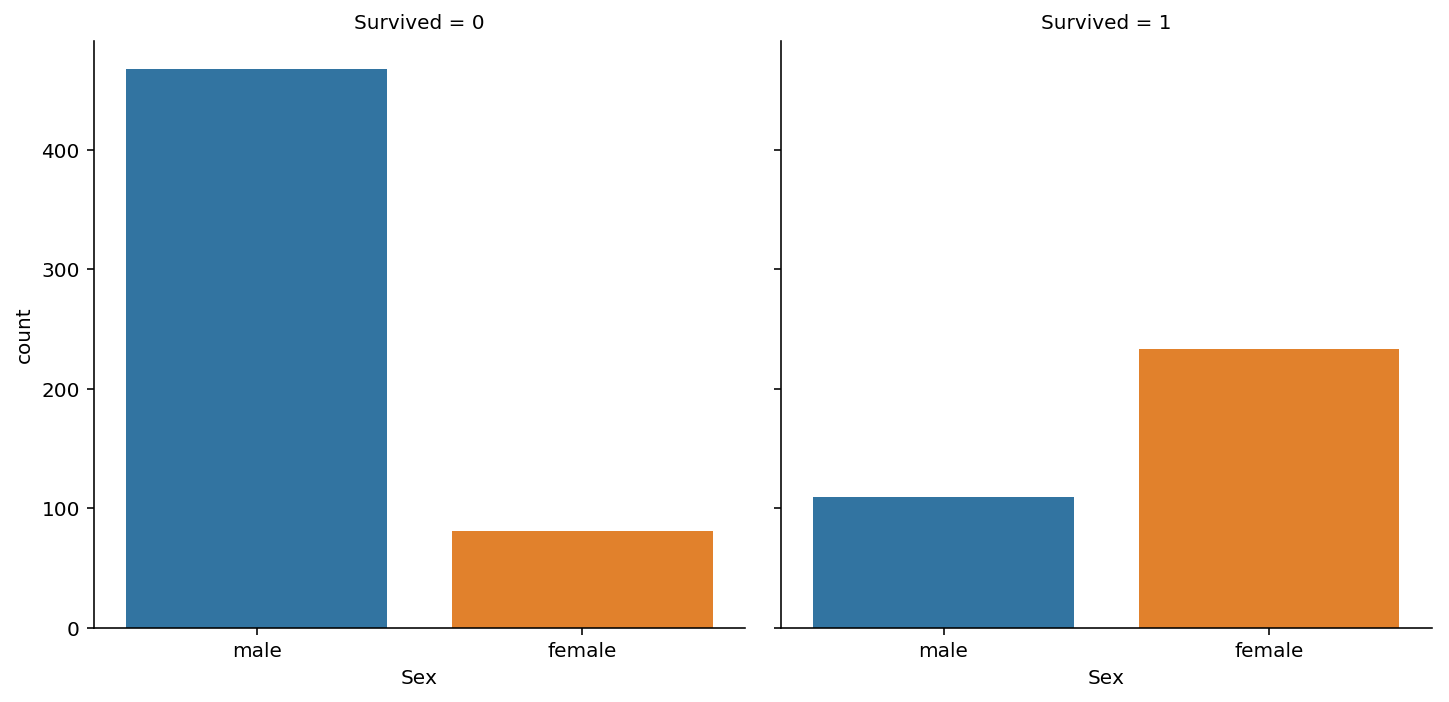

In [12]:
seaborn.catplot(x='Sex', col='Survived', kind='count', data=df);